<a href="https://colab.research.google.com/github/dudungE/AI_Finance/blob/master/9%EC%9E%A5_%EC%A3%BC%EA%B0%80%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 활성화함수



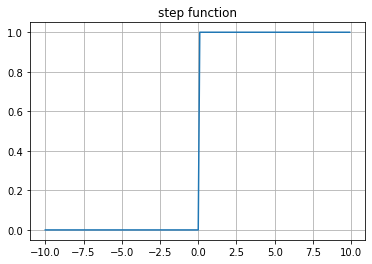

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def stepfunc(x):
    return np.where(x <= 0, 0, 1)

x = np.arange(-10, 10, 0.1)
y = stepfunc(x)

plt.plot(x, y)
plt.title('step function')
plt.grid(True)
plt.show()

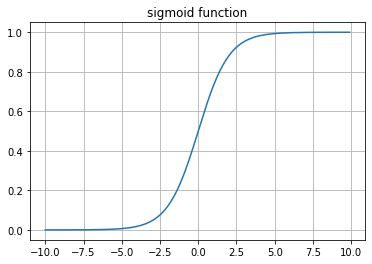

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

x = np.arange(-10, 10, 0.1)
y = sigmoid(x) 

plt.plot(x, y)
plt.title('sigmoid function')
plt.grid(True)
plt.show()

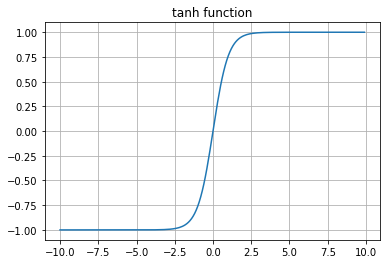

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))  

x = np.arange(-10, 10, 0.1) 
y = tanh(x) 

plt.plot(x, y)
plt.title('tanh function')
plt.grid(True)
plt.show()

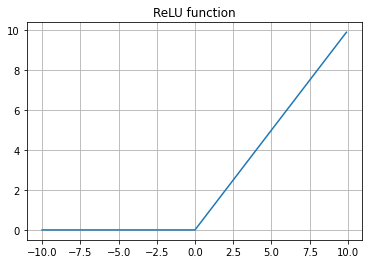

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-10, 10, 0.1)
y = relu(x)

plt.plot(x, y)
plt.title('ReLU function')
plt.grid(True)
plt.show()

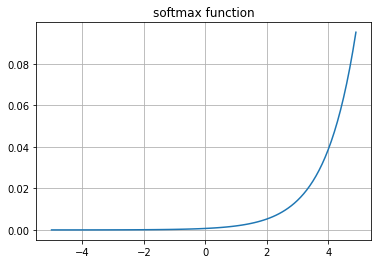


 [0.21194156 0.21194156 0.57611688]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

x = np.arange(-5, 5, 0.1)
y = softmax(x)

plt.plot(x, y)
plt.title('softmax function')
plt.grid(True)
plt.show()

print('\n',softmax([1,1,2]))

# 다층 퍼셉트론 구현
## 순전파

In [ ]:
import numpy as np

# 입력층 -> 은닉층(1층)
X = np.array([10, 20])  
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # weight 2x3개
B1 = np.array([1, 2, 3])                           # bias 3개

def sigmoid(x):                                    # 활성화 함수
    return 1 / (1 + np.exp(-x))

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print('A1 :', A1)  # 입력신호
print('Z1 :', Z1)  # 출력신호

A1 : [ 6. 13. 20.]
Z1 : [0.99752738 0.99999774 1.        ]


In [ ]:
# 은닉층(1층) -> 출력층(2층)
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # weight 3x2개
B2 = np.array([0.1, 0.2])                            # bias 2개

A2 = np.dot(Z1, W2) + B2    # Z1 : [0.99752738 0.99999774 1.]
Y = sigmoid(A2) 

print('A2 :', A2)
print('Y  :', Y)

A2 : [0.69975229 1.69900982]
Y  : [0.66813285 0.84540537]


# 선형 회귀 모델 학습 과정 
## 오차역전파

step|    w|    b| cost
----|-----|-----|-----
   1| 1.80| 0.65| 9.29


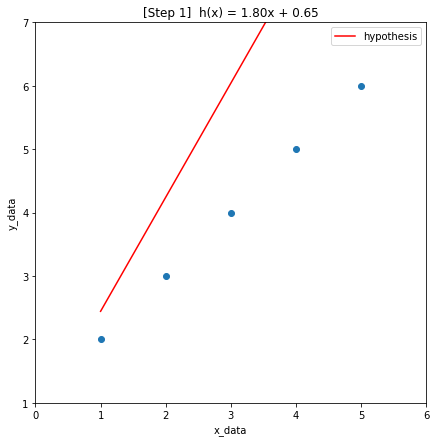

   3| 1.53| 0.57| 3.19


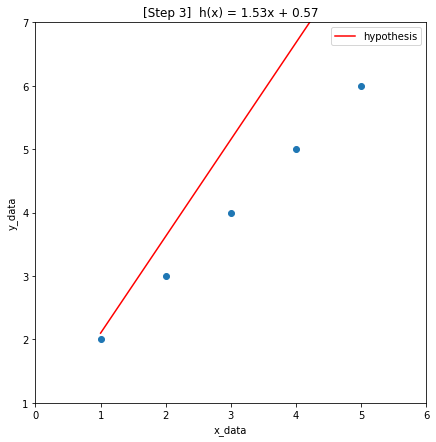

   5| 1.37| 0.53| 1.12


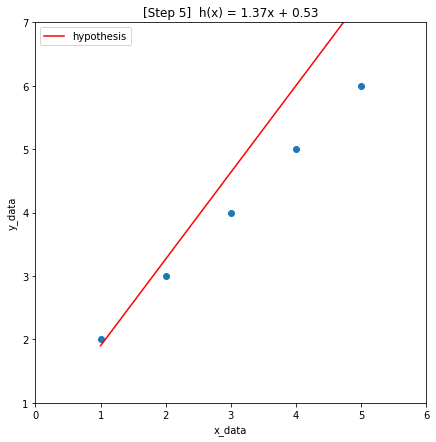

  10| 1.20| 0.50| 0.12


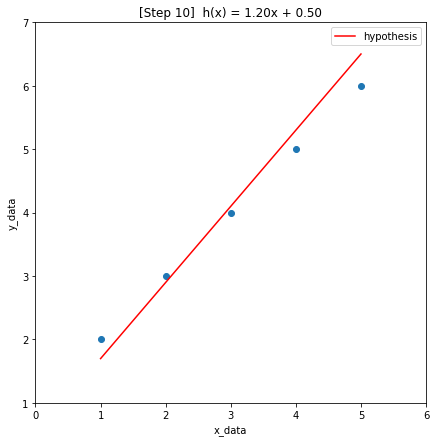

1000| 1.01| 0.98| 0.00


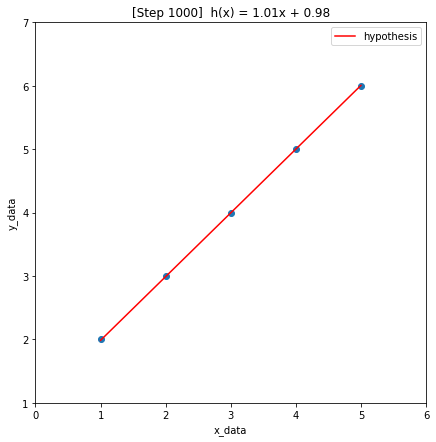

1100| 1.00| 0.99| 0.00


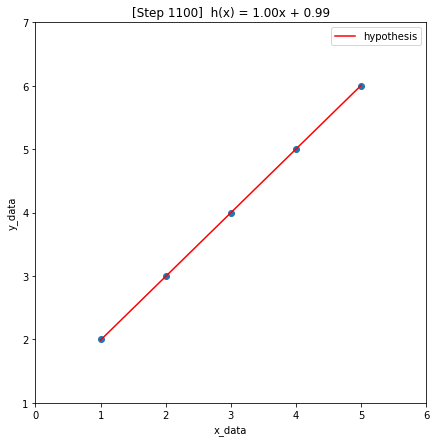

In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf

# y = ax + b에서 a, b 찾기

# 실제 data ( y = 1x+1)
x_data = [1, 2, 3, 4, 5]
y_data = [2, 3, 4, 5, 6]

# weight와 bias 초기설정
w = tf.Variable(2.0)
b = tf.Variable(0.7)
learn_rate = 0.01

print(f'step|    w|    b| cost')
print(f'----|-----|-----|-----')

for i in range(1, 1101): 
    with tf.GradientTape() as tape:              # Gradient Tape(이전 연산 과정 tape에 차곡차곡 기록)
        hypothesis = w * x_data + b              # 가설 설정
        cost = tf.reduce_mean((hypothesis - y_data)**2) # MSE 오차계산, =tf.losses.mean_squared_error(y, y_hat)

    dw, db = tape.gradient(cost, [w, b])  # cost를 w와 b에 대해 미분 
    w.assign_sub(learn_rate * dw) # w = w - lr*dw
    b.assign_sub(learn_rate * db) # b = b - lr*db
    
    if i in [1, 3, 5, 10, 1000, 1100]:
        print(f"{i:4d}| {w.numpy():.2f}| {b.numpy():.2f}| {cost:.2f}")
        plt.figure(figsize=(7, 7))
        plt.title(f'[Step {i:d}]  h(x) = { w.numpy():.2f}x + {b.numpy():.2f}')
        plt.plot(x_data, y_data, 'o') 
        plt.plot(x_data, w * x_data + b, 'r', label='hypothesis') 
        plt.xlabel('x_data')
        plt.ylabel('y_data')
        plt.xlim(0, 6)
        plt.ylim(1, 7)
        plt.legend(loc='best')
        plt.show()

# 주가딥러닝

In [1]:
!pip install pykrx

     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 256kB 14.7MB/s 


In [2]:
from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#df = stock.get_market_ohlcv_by_date("20190504", "20210531", "005930")   # 삼성전자
df = stock.get_market_ohlcv_by_date("20190504", "20210531", "005380")   # 현대차

dfx=df[['시가','고가','저가','거래량','종가']]
dfx.tail(3)
data=dfx

In [3]:
#데이터정규화

import numpy as np

numer=data-np.min(data,0)  # 옵션값 0은 열단위에서 구하는 최소값, 1은 행단위에서 구하는 최소값 
deno=np.max(data,0)-np.min(data,0)

dfx1=numer/(deno+1e-7)          # 오류 cover위해 분모에 작은 수 추가

dfx1

,시가,고가,저가,거래량,종가
날짜,,,,,
2019-05-07,0.330226,0.302752,0.354756,0.016400,0.347718
2019-05-08,0.330226,0.298165,0.354756,0.010226,0.345238
2019-05-09,0.332679,0.295872,0.339332,0.029806,0.322917
2019-05-10,0.315505,0.288991,0.323907,0.016326,0.317956
2019-05-13,0.298332,0.275229,0.323907,0.008192,0.312996
...,...,...,...,...,...
2021-05-25,0.798822,0.729358,0.822622,0.028377,0.801587
2021-05-26,0.786555,0.724771,0.809769,0.043915,0.781746
2021-05-27,0.764475,0.699541,0.796915,0.105747,0.766865


In [4]:
dfy1=dfx1['종가']           # dfy1에 종가데이터만 입력
                          
x = dfx1.values.tolist()       # 텐서플로우작업은 모두 values로 변경해야함 (numpy array로 변경)
y = dfy1.values.tolist()

In [5]:
dfx1.values[:,[1,2]][:10]

array([[0.30275229, 0.35475578],
       [0.29816514, 0.35475578],
       [0.29587156, 0.33933162],
       [0.28899083, 0.32390746],
       [0.27522936, 0.32390746],
       [0.26834862, 0.31876607],
       [0.2706422 , 0.31105398],
       [0.29357798, 0.31876607],
       [0.26376147, 0.30848329],
       [0.26834862, 0.31105398]])

In [6]:
print(x[0:]) 
print(y[0])   # 종가자료만

[[0.3302257114816829, 0.3027522935778428, 0.35475578406151426, 0.01639959543599191, 0.3477182539680815], [0.3302257114816829, 0.2981651376145421, 0.35475578406151426, 0.010225813927343206, 0.345238095237924], [0.33267909715390936, 0.2958715596328918, 0.3393316195371006, 0.029806409547190934, 0.3229166666665065], [0.31550539744832407, 0.2889908256879408, 0.3239074550126869, 0.01632618500767275, 0.3179563492061915], [0.2983316977427388, 0.27522935779803887, 0.3239074550126869, 0.008191680462618577, 0.3129960317458765], [0.3007850834149653, 0.2683486238530879, 0.3187660668378824, 0.011146412152830004, 0.3080357142855615], [0.29587831207051235, 0.27064220183473825, 0.31105398457567557, 0.013817902363217074, 0.3080357142855615], [0.3228655544650035, 0.2935779816512415, 0.3187660668378824, 0.039740408143717425, 0.305555555555404], [0.2934249263982859, 0.26376146788978727, 0.3084832904882733, 0.0038268293148183957, 0.295634920634774], [0.28606476938160647, 0.2683486238530879, 0.31105398457567

In [7]:
data_x=[]; data_y=[]
win_size=10
len(y) # 종가 개수

512

In [8]:
for i in range(len(y)-win_size):            # 1311-10=1301 (0 부터 1300까지)
  _x=x[i:i+win_size]  # 다음 날 종가 포함 X(window 10)
  _y=y[i+win_size]    # 다음 날 종가 포함 O(window 10 다음 날 종가) 
  data_x.append(_x) ; data_y.append(_y)

In [9]:
#훈련용 데이터 테스트데이터
train_size=int(len(data_y)*0.7)
trainX=np.array(data_x[0:train_size])
trainY=np.array(data_y[0:train_size])

test_size=int(len(data_y)-train_size)
testX=np.array(data_x[test_size:len(data_x)])
testY=np.array(data_y[test_size:len(data_y)])

In [10]:
import numpy
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# seed
numpy.random.seed(1)
tf.random.set_seed(1)

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(win_size, 5)))  # input_shape값의 10, 5는 10일간의 자료와 시가,고가,저가,거래량,종가의 5개자료
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(trainX, trainY, epochs=50, batch_size=30)

pred_y = model.predict(testX)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 10)            640       
_________________________________________________________________
dropout (Dropout)            (None, 10, 10)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 3s 8ms/step - loss: 0.0964
Epoch 2/50
12/12 [=======================

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


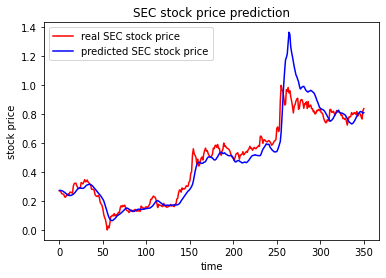

In [11]:
# Visualising the results
import matplotlib.pyplot as plt

plt.figure()
plt.plot(testY, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [13]:
print("Tomorrow's SEC price(y) :", df['종가'].iloc[-1] * pred_y[-1] / dfx1.종가.iloc[-1], 'KRW')

Tomorrow's SEC price(y) : [227119.06579749] KRW


In [ ]:
# raw_df.close[-1] : dfy.close[-1] = y : pred_y[-1]
print("Tomorrow's SEC price :", df['종가'].iloc[-1] * pred_y[-1] / dfy1[-1:], 'KRW')

Tomorrow's SEC price : 날짜
2021-05-31    227119.065797
Name: 종가, dtype: float64 KRW


In [ ]:
df['종가'].iloc[-1]

235000

In [ ]:
dfy1[-1:]

날짜
2021-05-31    0.83879
Name: 종가, dtype: float64

# 교재코드
### 데이터 불러오기

In [17]:
raw_df = stock.get_market_ohlcv_by_date("20190504", "20210611", "005930")
dfx=raw_df[['시가','고가','저가','거래량','종가']]
dfx.tail(3)
data=dfx


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
# from Investar import Analyzer


# raw_df = mk.get_daily_price('삼성전자', '2018-05-04', '2020-01-22')

window_size = 10 
data_size = 5

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

# dfx = raw_df[['open','high','low','volume', 'close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []

for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

[[0.7857142857126822, 0.7004566210032869, 0.7923946557023794, 0.09259255853045065, 0.7811244979903993], [0.7959183673453144, 0.7041095890398098, 0.7965056526191233, 0.10378148706223993, 0.7891566265044394], [0.7999999999983674, 0.7168949771676404, 0.8067831449109829, 0.11236216270320822, 0.7911646586329495], [0.7979591836718409, 0.7187214611859019, 0.8108941418277268, 0.139792345593601, 0.7951807228899695], [0.8163265306105789, 0.747945205478086, 0.8273381294947023, 0.2926609965307653, 0.83534136546017], [0.8448979591819492, 0.7424657534233015, 0.83556012332819, 0.1595551162108396, 0.8232931726891098], [0.8448979591819492, 0.7442922374415629, 0.8376156217865619, 0.14074174415107585, 0.8172690763035798], [0.8367346938758434, 0.7406392694050399, 0.8417266187033058, 0.097493940778289, 0.8172690763035798], [0.8204081632636319, 0.7296803652954709, 0.8273381294947023, 0.12226234319987753, 0.8012048192754996], [0.8163265306105789, 0.7187214611859019, 0.8232271325779584, 0.15344025981201348, 0

### 모델돌리기

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 10, 10)            640       
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 10)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 10)                840       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
12/12 [==============================] - 2s 8ms/step - loss: 0.0491
Epoch 2/60
12/12 [=====================

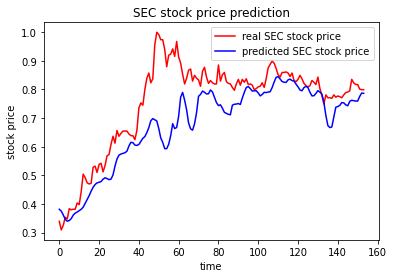

In [28]:
# seed
numpy.random.seed(11)
tf.random.set_seed(11)

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [29]:
# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df['종가'].iloc[-1] * pred_y[-1] / dfy[-1:], 'KRW')

Tomorrow's SEC price :                       종가
날짜                      
2021-06-11  79718.828504 KRW


In [30]:
raw_df['종가'].iloc[-1] * pred_y[-1] / dfy[-1:]

,종가
날짜,
2021-06-11,79718.828504


# 다른기간

[[0.786187322609676, 0.7212837837825654, 0.798670465335615, 0.1402146523397778, 0.7964519140974856], [0.8202459791848244, 0.7314189189176834, 0.80436847103361, 0.1552314196964209, 0.7871148459369055], [0.7975402081347256, 0.7162162162150064, 0.8024691358009449, 0.15236239739567708, 0.7871148459369055], [0.793755912959709, 0.7111486486474474, 0.8024691358009449, 0.14127295705037, 0.7852474323047894], [0.8070009460722668, 0.7415540540528014, 0.8157644824295996, 0.19272702241403858, 0.7964519140974856], [0.8070009460722668, 0.7229729729717517, 0.8100664767316048, 0.10468186329894758, 0.7889822595690215], [0.8051087984847586, 0.7229729729717517, 0.8157644824295996, 0.10736261939892032, 0.7927170868332536], [0.8126773888347916, 0.724662162160938, 0.8138651471969347, 0.08821722035967401, 0.7908496732011375], [0.8051087984847586, 0.7162162162150064, 0.8024691358009449, 0.2187666640675094, 0.7871148459369055], [0.801324503309742, 0.7229729729717517, 0.8081671414989399, 0.09259255853045065, 0.7

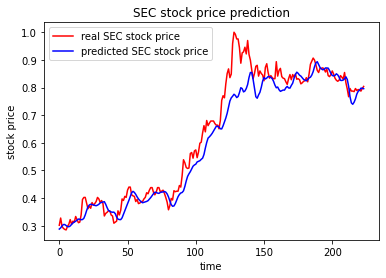

Tomorrow's SEC price :                       종가
날짜                      
2021-05-31  79677.356361 KRW


In [ ]:
raw_df = stock.get_market_ohlcv_by_date("20180504", "20210531", "005930")
dfx=raw_df[['시가','고가','저가','거래량','종가']]
dfx.tail(3)
data=dfx

import numpy
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
# from Investar import Analyzer


# raw_df = mk.get_daily_price('삼성전자', '2018-05-04', '2021-05-10')

window_size = 10 
data_size = 5

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

# dfx = raw_df[['open','high','low','volume', 'close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []

for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])



# seed
numpy.random.seed(11)
tf.random.set_seed(11)


# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df['종가'].iloc[-1] * pred_y[-1] / dfy[-1:], 'KRW')

In [ ]:
# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df['종가'].iloc[-1] * pred_y[-1] / dfy[-1:], 'KRW')

Tomorrow's SEC price :                       종가
날짜                      
2021-05-31  79677.356361 KRW
